In [ ]:
import pandas as stocktrend_pand
StockTrends = stocktrend_pand.read_csv('AAPL.csv')
num_rows, num_columns = StockTrends.shape
print(f"Number of Rows in Apple Stock   : {num_rows}")
print(f"Number of Columns in Apple Stock: {num_columns}")
print("\nApple Stocks:\n", StockTrends)

Number of Rows in Apple Stock   : 10409
Number of Columns in Apple Stock: 7

Apple Stocks:
              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100323   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095089   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088110   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090291   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092908   
...           ...         ...         ...         ...         ...         ...   
10404  2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
10405  2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
10406  2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
10407  2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
10408  2022-03-24

In [ ]:
StockTrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [ ]:
StockTrends['Close'].value_counts()

Close
0.399554      40
0.352679      31
0.354911      31
0.372768      30
0.366071      28
              ..
6.620357       1
6.646429       1
6.667500       1
6.678929       1
174.070007     1
Name: count, Length: 5871, dtype: int64

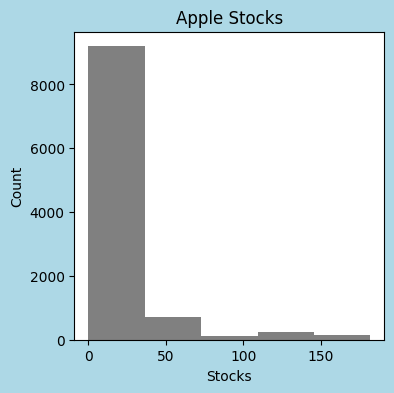

In [ ]:
import matplotlib.pyplot as stocktrend_matp
import warnings as stocktrendwrng
fig = stocktrend_matp.figure(figsize=(4, 4), facecolor='lightblue')
stocktrend_matp.hist(StockTrends['Close'], bins=5, color = "grey")
stocktrend_matp.title('Apple Stocks')
stocktrend_matp.xlabel("Stocks")
stocktrend_matp.ylabel("Count")
stocktrend_matp.show()

[Text(0.5, 1.0, 'Apple Stock Price'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Stock Price')]

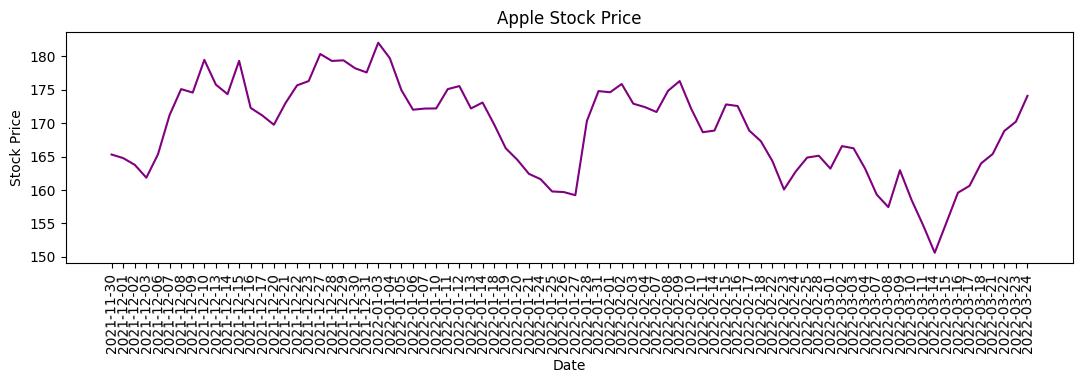

In [ ]:
stocktrend_matp.figure(figsize=(13, 3))
import seaborn as stocktrend_seb
stocktrend_matp.xticks(rotation=91)
stockline= stocktrend_seb.lineplot(x=StockTrends["Date"][-80:], y=StockTrends['Close'][-80:], color='purple')
stockline.set(title= 'Apple Stock Price', xlabel ='Date', ylabel ='Stock Price')

In [ ]:
print("NaN in Apple Stock :",StockTrends.isnull().values.sum())
print("Duplicates in Apple Stock :",StockTrends[StockTrends.duplicated()].shape[0])

NaN in Apple Stock : 0
Duplicates in Apple Stock : 0


In [ ]:
stocktrendwrng.filterwarnings("ignore")
StockTrends= StockTrends[['Date', 'Close']]
StockTrends

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10404,2022-03-18,163.979996
10405,2022-03-21,165.380005
10406,2022-03-22,168.820007
10407,2022-03-23,170.210007


In [ ]:
import numpy as stocktrendnmpy
from tensorflow.keras.models import Sequential as stocktrendSqtial
from tensorflow.keras.layers import Dense as stocktrendDn

from sklearn.metrics import r2_score as stocktrendRsq
from sklearn.metrics import mean_absolute_error as stocktrendMAE
from sklearn.metrics import mean_squared_error as stocktrendMSE
import math as stocktrendMath

StockTrends = StockTrends.replace([stocktrendnmpy.inf, -stocktrendnmpy.inf, stocktrendnmpy.nan], 0).reset_index(drop=True)

In [ ]:
#===== Function to create sequences of data
def stocktrnd(stockTS, stockStep):
    stocktrend_X = []
    stocktrend_y = []
    for s in range(len(stockTS)):
        StockEnd = s + stockStep
        if StockEnd > len(stockTS)-1:
            break
        StockEnd_ip, StockEnd_op = stockTS[s:StockEnd], stockTS[StockEnd]
        stocktrend_X.append(StockEnd_ip)
        stocktrend_y.append(StockEnd_op)
    return stocktrendnmpy.array(stocktrend_X), stocktrendnmpy.array(stocktrend_y)

In [ ]:
#====== Training and testing the stock data
stockStep = 2
stocktrend_Xt, stocktrend_yt = stocktrnd(StockTrends['Close'][:-100].tolist(), stockStep)
stocktrend_Xs, stocktrend_ys = stocktrnd(StockTrends['Close'][-110:].tolist(), stockStep)
print("Apple Stock Training: ", stocktrend_Xt.shape)
print("Apple Stock Testing : ", stocktrend_Xs.shape)

Apple Stock Training:  (10307, 2)
Apple Stock Testing :  (108, 2)


In [ ]:
#======= Reshape the stock data
stocktrend_Xt = stocktrend_Xt.reshape(stocktrend_Xt.shape[0], stocktrend_Xt.shape[1], 1)
stocktrend_Xs = stocktrend_Xs.reshape(stocktrend_Xs.shape[0], stocktrend_Xs.shape[1], 1)

print("Reshaped Training Apple Stock: ", stocktrend_Xt.shape)
print("Reshaped Testing Apple Stock :", stocktrend_Xs.shape)

Reshaped Training Apple Stock:  (10307, 2, 1)
Reshaped Testing Apple Stock : (108, 2, 1)


## **Unidirectional Models**

### **Apple Stock - Unidirectional LSTM**

Epoch 1/20
104/104 [==============================] - 9s 12ms/step - loss: 7.7687
Epoch 2/20
104/104 [==============================] - 1s 12ms/step - loss: 0.4047
Epoch 3/20
104/104 [==============================] - 1s 14ms/step - loss: 0.1968
Epoch 4/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1382
Epoch 5/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1178
Epoch 6/20
104/104 [==============================] - 2s 14ms/step - loss: 0.1115
Epoch 7/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1116
Epoch 8/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1105
Epoch 9/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1081
Epoch 10/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1056
Epoch 11/20
104/104 [==============================] - 1s 12ms/step - loss: 0.1076
Epoch 12/20
104/104 [==============================] - 1s 7ms/step - loss: 0.1056
Epoch 13/20
10

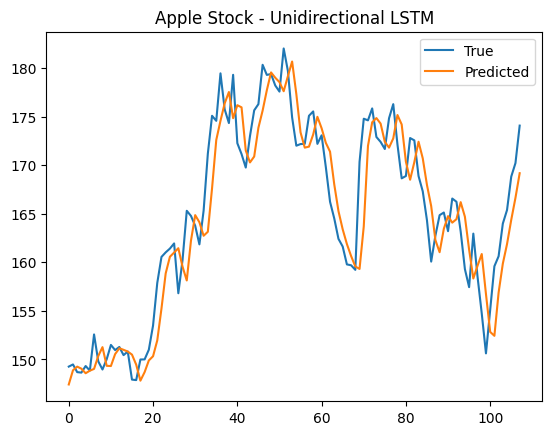

In [ ]:
from tensorflow.keras.layers import LSTM as stocktrendUnLST
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Apple Stock - Unidirectional LSTM:\n")
print("Apple Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Apple Stock - Unidirectional LSTM")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Apple Stock - Unidirectional GRU**

Epoch 1/20
104/104 [==============================] - 2s 6ms/step - loss: 4.9030
Epoch 2/20
104/104 [==============================] - 1s 6ms/step - loss: 0.1414
Epoch 3/20
104/104 [==============================] - 1s 9ms/step - loss: 0.1034
Epoch 4/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0975
Epoch 5/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0976
Epoch 6/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0956
Epoch 7/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0987
Epoch 8/20
104/104 [==============================] - 1s 9ms/step - loss: 0.0930
Epoch 9/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0956
Epoch 10/20
104/104 [==============================] - 1s 6ms/step - loss: 0.0929
Epoch 11/20
104/104 [==============================] - 1s 6ms/step - loss: 0.0920
Epoch 12/20
104/104 [==============================] - 1s 6ms/step - loss: 0.0905
Epoch 13/20
104/104 [

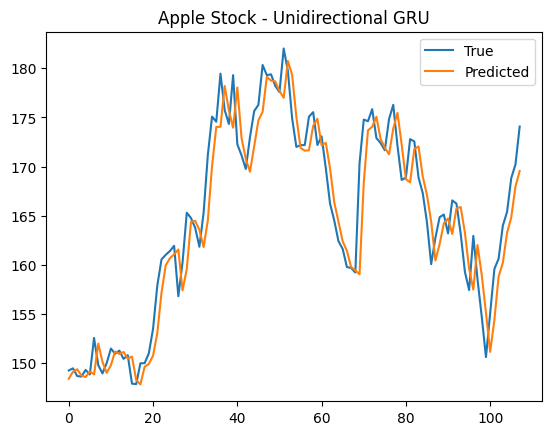

In [ ]:
from tensorflow.keras.layers import GRU as stocktrendUnGR
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Apple Stock - Unidirectional GRU:\n")
print("Apple Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Apple Stock - Unidirectional GRU")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Apple Stock - Unidirectional RNN**

Epoch 1/20
104/104 [==============================] - 1s 3ms/step - loss: 1.1098
Epoch 2/20
104/104 [==============================] - 0s 3ms/step - loss: 0.1125
Epoch 3/20
104/104 [==============================] - 0s 3ms/step - loss: 0.1100
Epoch 4/20
104/104 [==============================] - 0s 3ms/step - loss: 0.1083
Epoch 5/20
104/104 [==============================] - 0s 4ms/step - loss: 0.1059
Epoch 6/20
104/104 [==============================] - 0s 5ms/step - loss: 0.1091
Epoch 7/20
104/104 [==============================] - 0s 5ms/step - loss: 0.1049
Epoch 8/20
104/104 [==============================] - 1s 5ms/step - loss: 0.1056
Epoch 9/20
104/104 [==============================] - 0s 5ms/step - loss: 0.1074
Epoch 10/20
104/104 [==============================] - 1s 5ms/step - loss: 0.1044
Epoch 11/20
104/104 [==============================] - 0s 5ms/step - loss: 0.1025
Epoch 12/20
104/104 [==============================] - 1s 5ms/step - loss: 0.1093
Epoch 13/20
104/104 [====

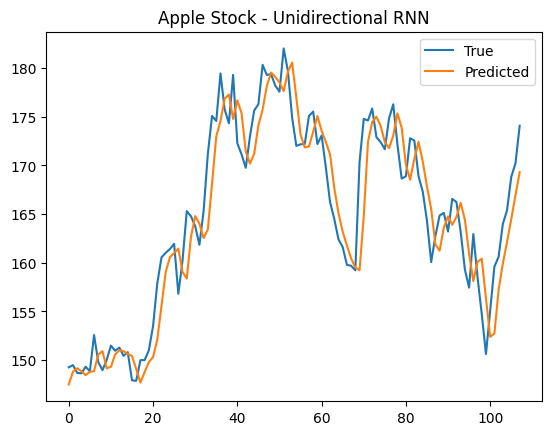

In [ ]:
from tensorflow.keras.layers import SimpleRNN as stocktrendUnRN
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnRN(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Apple Stock - Unidirectional RNN:\n")
print("Apple Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Apple Stock - Unidirectional RNN")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Apple Stock - Stacked LSTM**

Epoch 1/20
104/104 [==============================] - 4s 12ms/step - loss: 3.7591
Epoch 2/20
104/104 [==============================] - 1s 13ms/step - loss: 0.2496
Epoch 3/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1586
Epoch 4/20
104/104 [==============================] - 2s 18ms/step - loss: 0.1295
Epoch 5/20
104/104 [==============================] - 2s 23ms/step - loss: 0.1182
Epoch 6/20
104/104 [==============================] - 2s 22ms/step - loss: 0.1153
Epoch 7/20
104/104 [==============================] - 2s 21ms/step - loss: 0.1239
Epoch 8/20
104/104 [==============================] - 2s 24ms/step - loss: 0.1222
Epoch 9/20
104/104 [==============================] - 2s 18ms/step - loss: 0.1146
Epoch 10/20
104/104 [==============================] - 1s 12ms/step - loss: 0.1143
Epoch 11/20
104/104 [==============================] - 1s 12ms/step - loss: 0.1149
Epoch 12/20
104/104 [==============================] - 2s 18ms/step - loss: 0.1228
Epoch 13/20
1

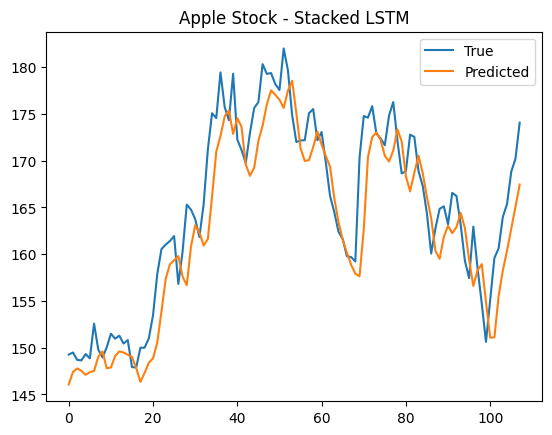

In [ ]:
from tensorflow.keras.layers import LSTM as stocktrendStLST
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Apple Stock - Stacked LSTM:\n")
print("Apple Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Apple Stock - Stacked LSTM")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Apple Stock - Stacked GRU**

Epoch 1/20
104/104 [==============================] - 4s 11ms/step - loss: 2.8340
Epoch 2/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1102
Epoch 3/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1032
Epoch 4/20
104/104 [==============================] - 1s 11ms/step - loss: 0.0994
Epoch 5/20
104/104 [==============================] - 2s 19ms/step - loss: 0.1020
Epoch 6/20
104/104 [==============================] - 2s 21ms/step - loss: 0.0982
Epoch 7/20
104/104 [==============================] - 2s 18ms/step - loss: 0.1168
Epoch 8/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1046
Epoch 9/20
104/104 [==============================] - 1s 11ms/step - loss: 0.0995
Epoch 10/20
104/104 [==============================] - 1s 11ms/step - loss: 0.0951
Epoch 11/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1007
Epoch 12/20
104/104 [==============================] - 1s 11ms/step - loss: 0.0908
Epoch 13/20
1

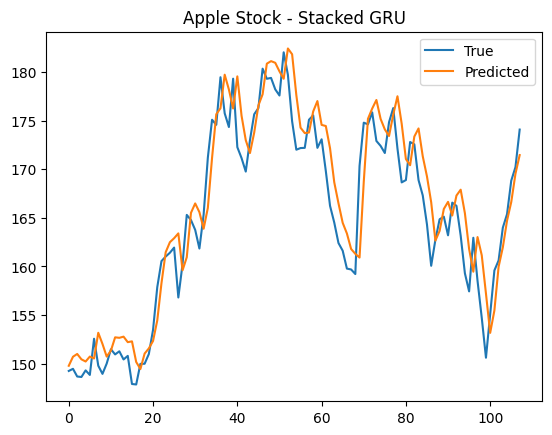

In [ ]:
from tensorflow.keras.layers import GRU as stocktrendStGR
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Apple Stock - Stacked GRU:\n")
print("Apple Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Apple Stock - Stacked GRU")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Apple Stock - Stacked RNN**

Epoch 1/20
104/104 [==============================] - 4s 13ms/step - loss: 4.3532
Epoch 2/20
104/104 [==============================] - 1s 13ms/step - loss: 0.2510
Epoch 3/20
104/104 [==============================] - 2s 17ms/step - loss: 0.1460
Epoch 4/20
104/104 [==============================] - 2s 24ms/step - loss: 0.1317
Epoch 5/20
104/104 [==============================] - 2s 24ms/step - loss: 0.1262
Epoch 6/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1184
Epoch 7/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1266
Epoch 8/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1142
Epoch 9/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1174
Epoch 10/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1182
Epoch 11/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1134
Epoch 12/20
104/104 [==============================] - 1s 13ms/step - loss: 0.1173
Epoch 13/20
1

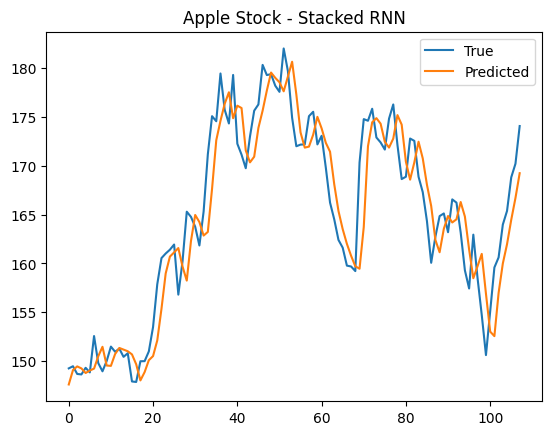

In [ ]:
from tensorflow.keras.layers import SimpleRNN as stocktrendStRN
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Apple Stock - Stacked RNN:\n")
print("Apple Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Apple Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Apple Stock - Stacked RNN")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()